<h1><center>Exercise Sheet 5 Ulzii-Utas.N</center></h1>

# Exercise 1.1
Compute and sketch the solution for the initial conditions:

In [1]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.linalg import expm, sinm, cosm
%matplotlib inline

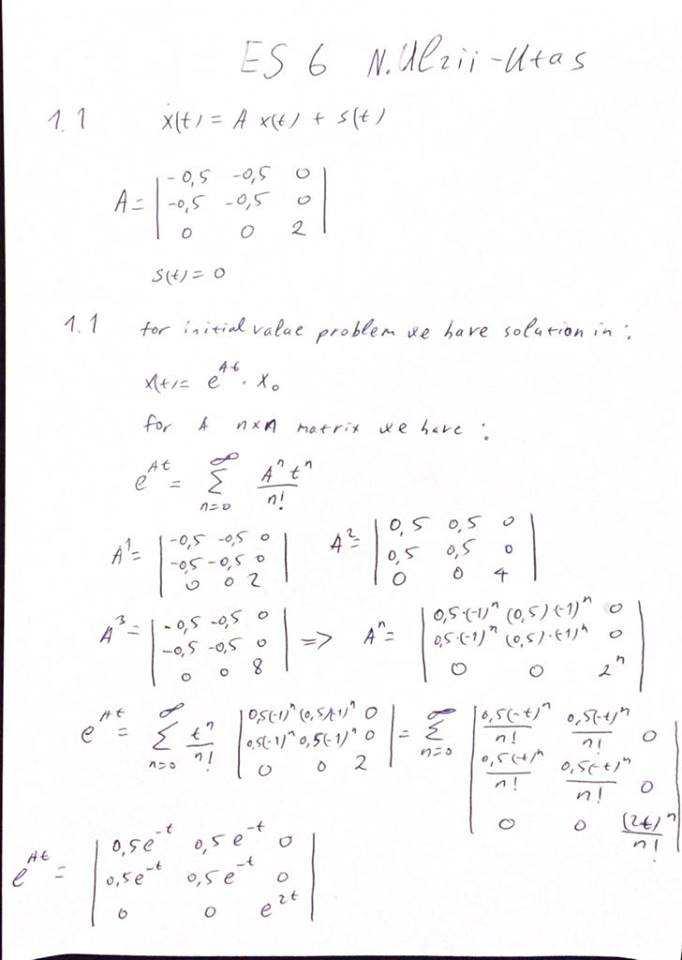

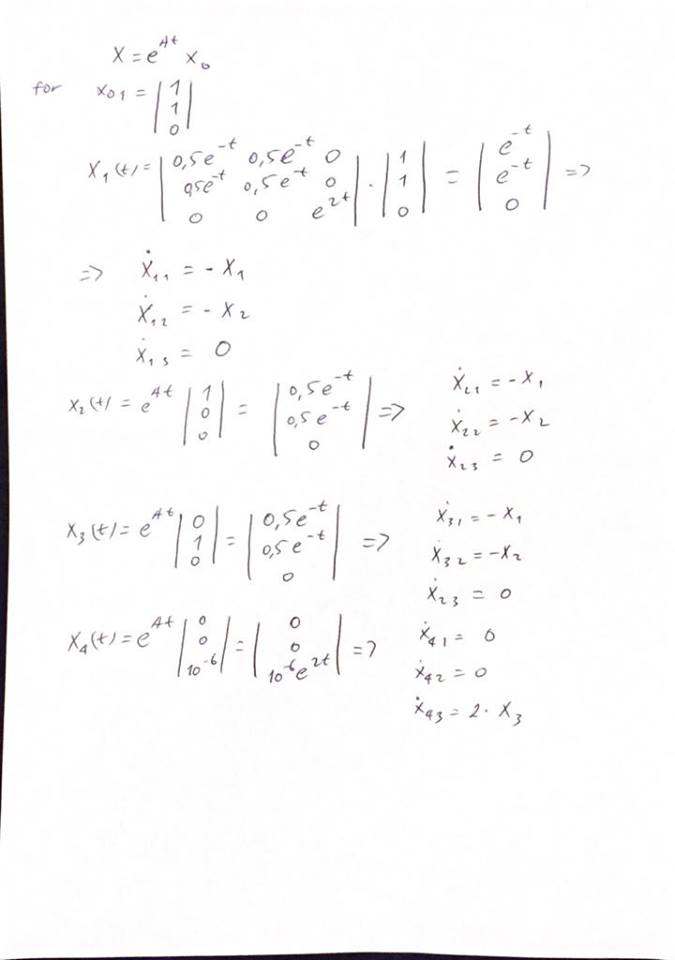

[1.00000000e-06 1.22140276e-06 1.49182470e-06 1.82211880e-06
 2.22554093e-06 2.71828183e-06 3.32011692e-06 4.05519997e-06
 4.95303242e-06 6.04964746e-06 7.38905610e-06 9.02501350e-06
 1.10231764e-05 1.34637380e-05 1.64446468e-05 2.00855369e-05
 2.45325302e-05 2.99641000e-05 3.65982344e-05 4.47011845e-05
 5.45981500e-05]


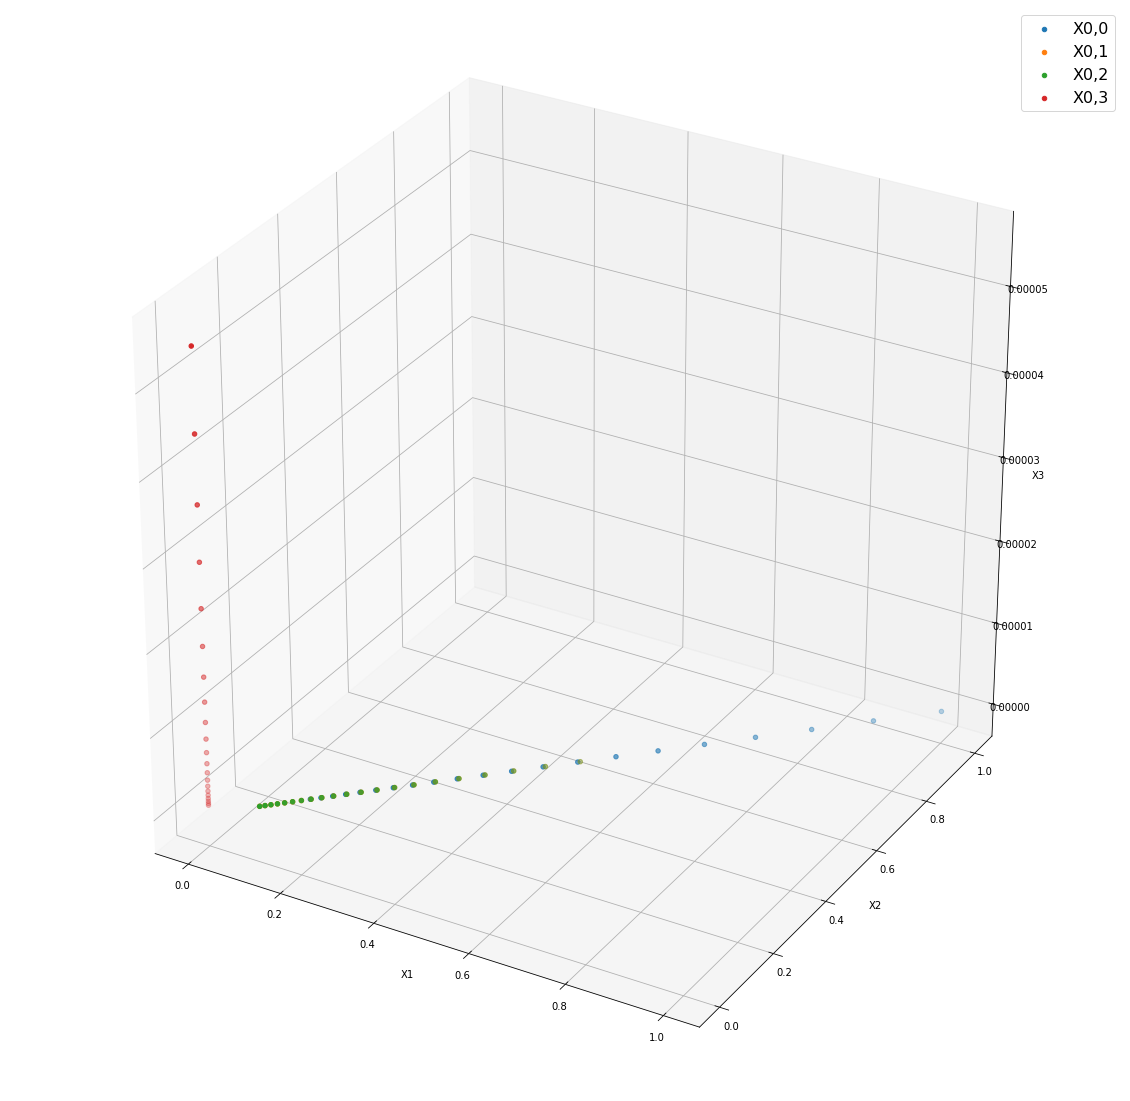

In [2]:
t = np.arange(0, 2.1, .1)
x0 = np.exp(-t)
y0 = np.exp(-t)
z0 = np.zeros(len(t))

x1 = 0.5 * np.exp(-t)
y1 = 0.5 * np.exp(-t)
z1 = np.zeros(len(t))

x2 = 0.5 * np.exp(-t)
y2 = 0.5 * np.exp(-t)
z2 = np.zeros(len(t))

x3 = np.zeros(len(t))
y3 = np.zeros(len(t))
z3 = 10**(-6) * np.exp(2 * t)
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax0 = ax.scatter(x0, y0, z0)
ax1 = ax.scatter(x1, y1, z1)
ax2 = ax.scatter(x2, y2, z2)
ax3 = ax.scatter(x3, y3, z3)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend((ax0, ax1, ax2, ax3), ('X0,0', 'X0,1', 'X0,2', 'X0,3'), fontsize = 16)
plt.show()

As shown in the plot, when the X0 initial value disregards the X3 it is going in the horizontal line and it converges into 0. In vice versa, X0,4[0, 0, 10^-6] initial point shows that it started around zero and is diverges as t goes to infinity. 

Scatter starting point is where the points are collored less brightly.
Finishing point is where the scatter point is brightly colored.

# Exercise 1.2

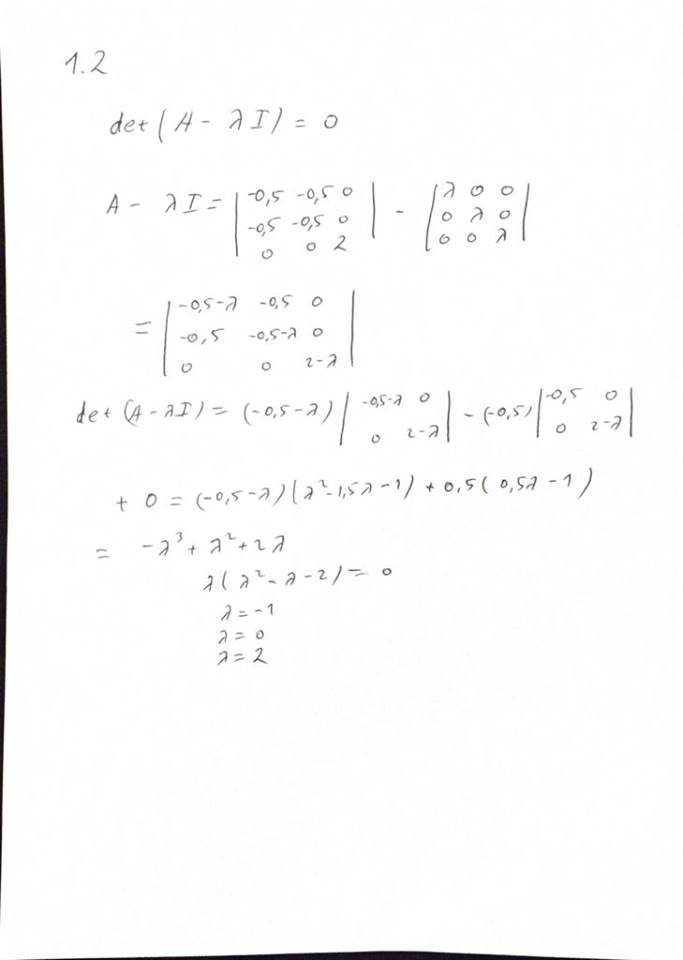

We saw X3 was diverging and X1 and X2 was converging to point 0. Therefore, we can also see similar characteristics from eigenvalues where eigenvalue less than 0 will give us convergence and more than 0 will give us divergence. Also, when we have one eigenvalue less than 0 and one eigenvalue equal to 0, we have marginally stable manifold

# Exercise 1.3

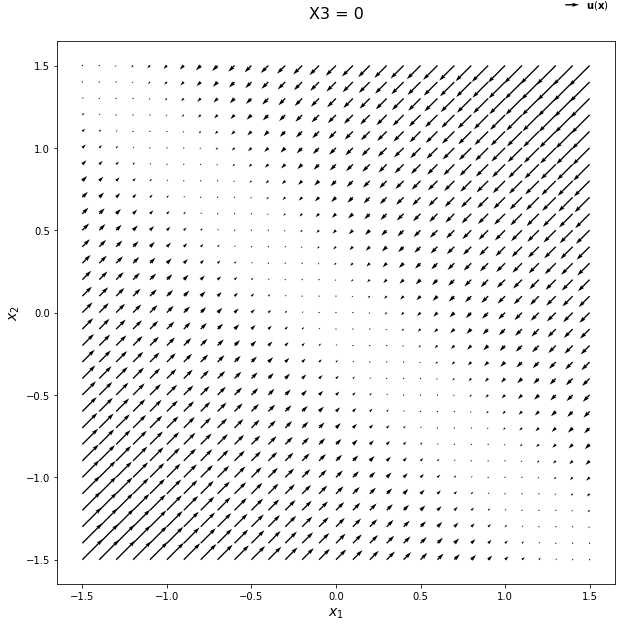

In [3]:
# define points and vectors
X1, X2 = np.meshgrid(np.arange(-1.5, 1.6, .1), np.arange(-1.5, 1.6, .1))
U1 = -X1 - X2
U2 = -X1 - X2

plt.figure(figsize=(10, 10))
plt.title('X3 = 0', fontsize=16, y=1.03)
Q = plt.quiver(X1, X2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

As, we have seen from eigenvalues we have marginally stable manifold for X1 and X2

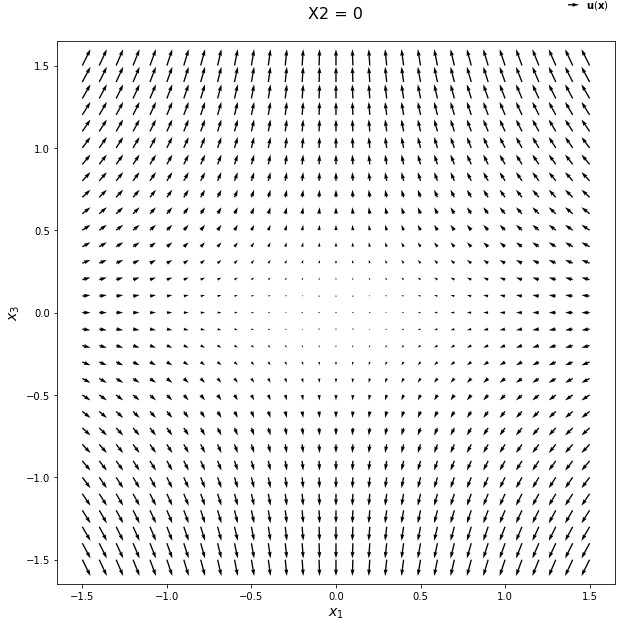

In [4]:
# define points and vectors
X1, X3 = np.meshgrid(np.arange(-1.5, 1.6, .1), np.arange(-1.5, 1.6, .1))   
U1 = -X1
U3 = 2*X3

plt.figure(figsize=(10, 10))
plt.title('X2 = 0', fontsize=16, y=1.03)
Q = plt.quiver(X1, X3, U1, U3)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_3$', fontsize=14)
plt.show()

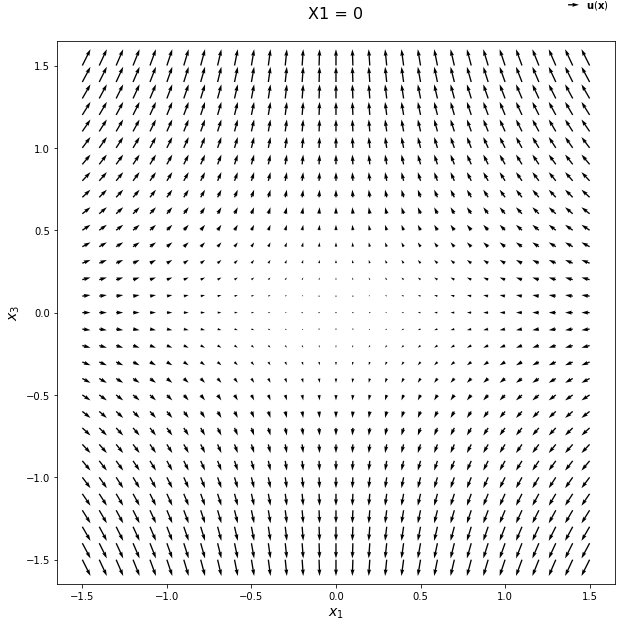

In [5]:
# define points and vectors
X2, X3 = np.meshgrid(np.arange(-1.5, 1.6, .1), np.arange(-1.5, 1.6, .1))   
U2 = - X2
U3 = 2*X3

plt.figure(figsize=(10, 10))
plt.title('X1 = 0', fontsize=16, y=1.03)
Q = plt.quiver(X2, X3, U2, U3)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_3$', fontsize=14)
plt.show()

We are diverging in X3

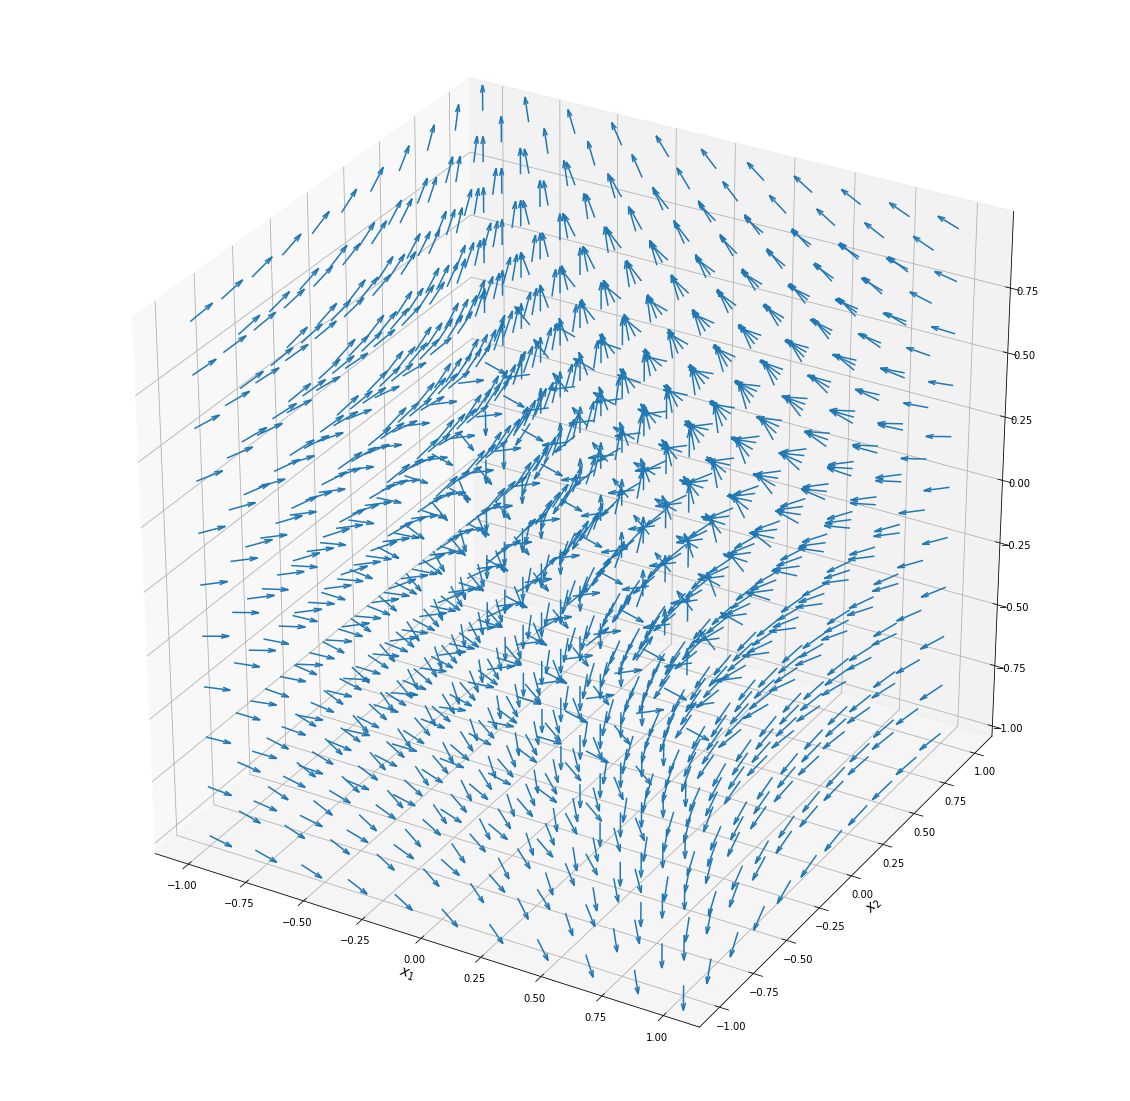

In [6]:
X1, X2, X3 = np.meshgrid(np.arange(-1, 1.1, .2), np.arange(-1, 1.1, .2), np.arange(-1, 1.1, .2)) 
U1 = -X1 - X2
U2 = -X1 - X2
U3 = 2 * X3
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax.quiver(X1, X2, X3, U1, U2, U3, length=0.1, normalize=True)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

# Exercise 1.4
$ Projection(B) = A(A^tA)^{-1}A^tB$

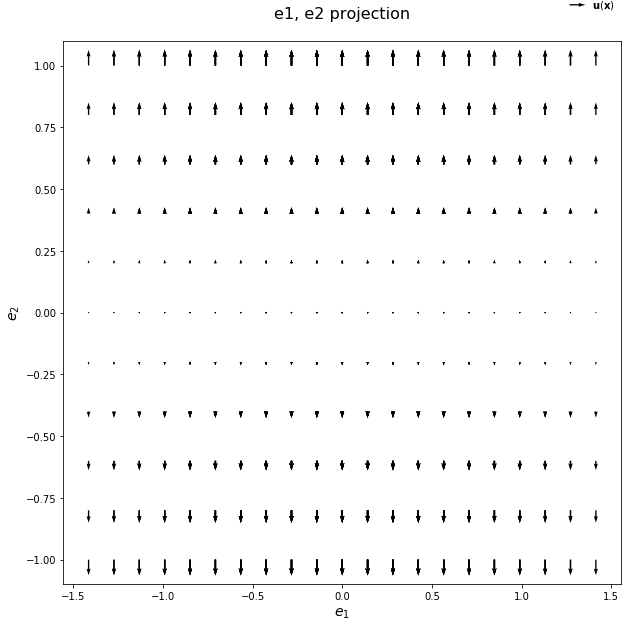

In [7]:
U_flat = np.array([U1.flatten(), U2.flatten(), U3.flatten()])
X_flat = np.array([X1.flatten(), X2.flatten(), X3.flatten()])

e1 = np.array([[(1/np.sqrt(2))], [(-1/np.sqrt(2))], [0]])
e2 = np.array([[0], [0], [1]])
e = np.concatenate((e1, e2),axis=1)

e_t = np.matrix.transpose(e)
et_e = np.matmul(e_t, e)
et_e_inv = np.linalg.inv(et_e)
Q = np.matmul(e, et_e_inv)
Q = np.matmul(Q, e_t)

def projection(B):
    return np.matmul(Q, B)

U_flat_proj = projection(U_flat)
X_flat_proj = projection(X_flat)

U_flat_proj = np.matmul(e_t, U_flat_proj)
X_flat_proj = np.matmul(e_t, X_flat_proj)

plt.figure(figsize=(10, 10))
plt.title('e1, e2 projection', fontsize=16, y=1.03)
Q = plt.quiver(X_flat_proj[0,:], X_flat_proj[1,:], U_flat_proj[0,:], U_flat_proj[1,:])
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$e_1$', fontsize=14)
plt.ylabel('$e_2$', fontsize=14)
plt.show()

# Exercise 1.5

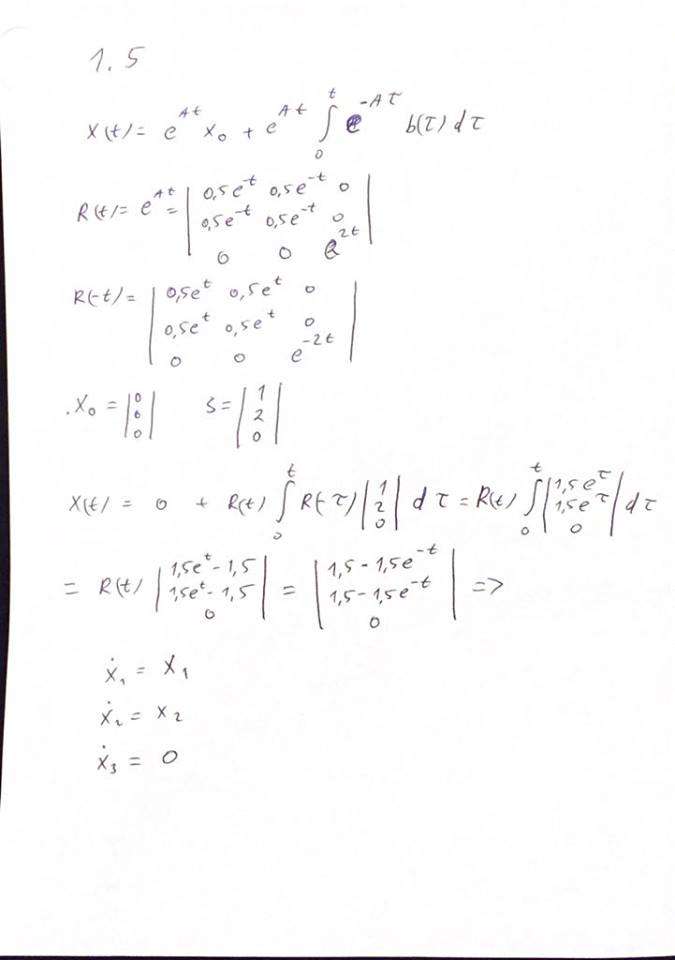

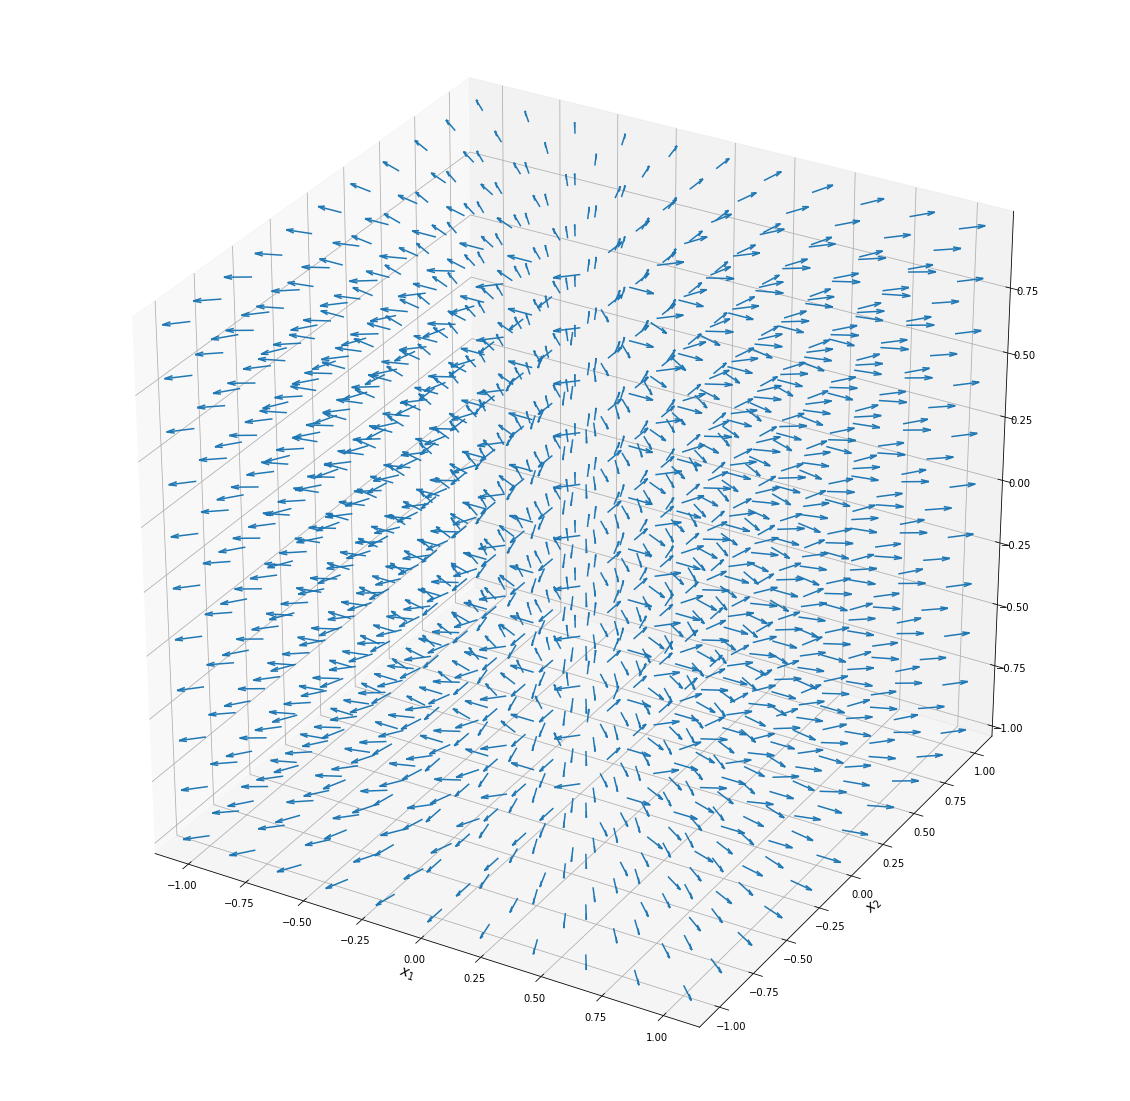

In [8]:
X1, X2, X3 = np.meshgrid(np.arange(-1, 1.1, .2), np.arange(-1, 1.1, .2), np.arange(-1, 1.1, .2)) 
U1 = X1
U2 = X2
U3 = 0
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

ax.quiver(X1, X2, X3, U1, U2, U3, length=0.1, normalize=True)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

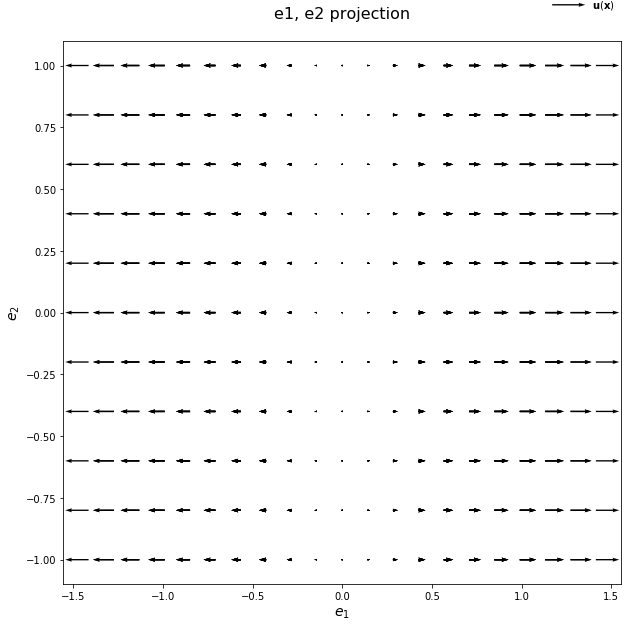

In [9]:
U3 = U2
U3 = U3*0
U_flat = np.array([U1.flatten(), U2.flatten(), U3.flatten()])
X_flat = np.array([X1.flatten(), X2.flatten(), X3.flatten()])

e1 = np.array([[(1/np.sqrt(2))], [(-1/np.sqrt(2))], [0]])
e2 = np.array([[0], [0], [1]])
e = np.concatenate((e1, e2),axis=1)

e_t = np.matrix.transpose(e)
et_e = np.matmul(e_t, e)
et_e_inv = np.linalg.inv(et_e)
Q = np.matmul(e, et_e_inv)
Q = np.matmul(Q, e_t)


def projection(B):
    return np.matmul(Q, B)

U_flat_proj = projection(U_flat)
X_flat_proj = projection(X_flat)

U_flat_proj = np.matmul(e_t, U_flat_proj)
X_flat_proj = np.matmul(e_t, X_flat_proj)

plt.figure(figsize=(10, 10))
plt.title('e1, e2 projection', fontsize=16, y=1.03)
Q = plt.quiver(X_flat_proj[0,:], X_flat_proj[1,:], U_flat_proj[0,:], U_flat_proj[1,:])
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$e_1$', fontsize=14)
plt.ylabel('$e_2$', fontsize=14)
plt.show()

# Exercise 2.1

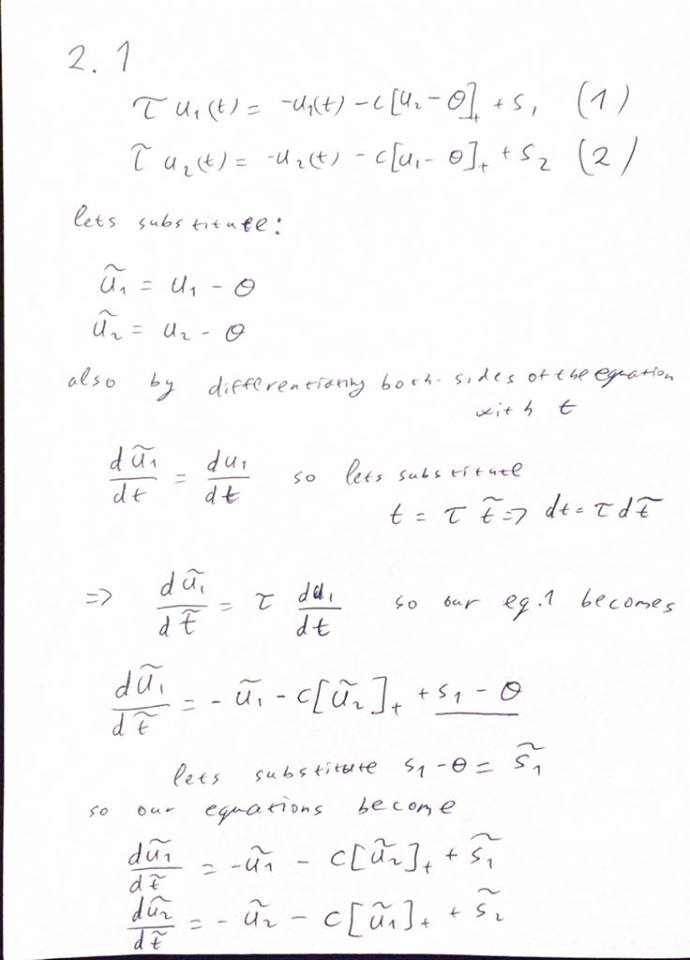

# Exercise 2.2

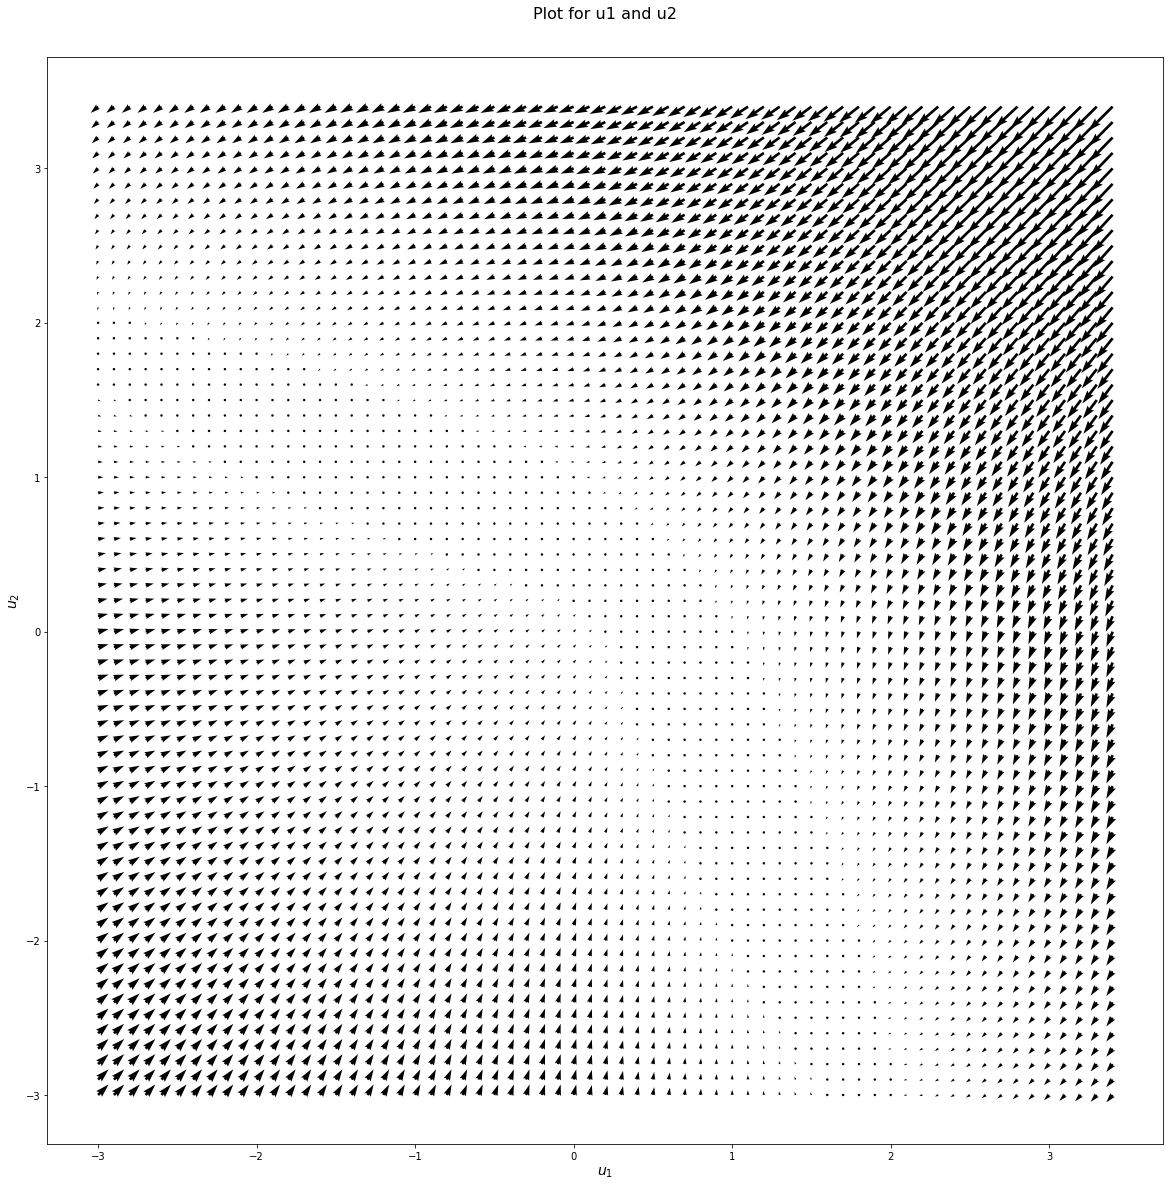

In [10]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(-3, 3.5, .1), np.arange(-3, 3.5, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(-3, 3.5, .1), np.arange(-3, 3.5, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 - 2 * u2_plus + 1
U2 = -u2 - 2 * u1_plus + 1

plt.figure(figsize=(20, 20))
plt.title('Plot for u1 and u2', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

This system has 4 fixed points and shows a saddle system characteristics

# Exercise 2.3

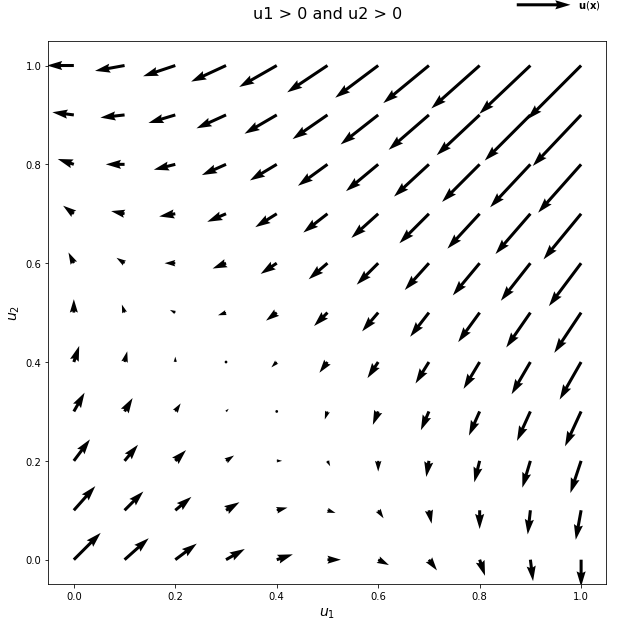

In [11]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 - 2 * u2_plus + 1
U2 = -u2 - 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 > 0 and u2 > 0', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

As computed from equation for fixed points when u1 > 0 and u2 > 0, It has fixed point u1 = 1/3 and u2 = 1/3. 

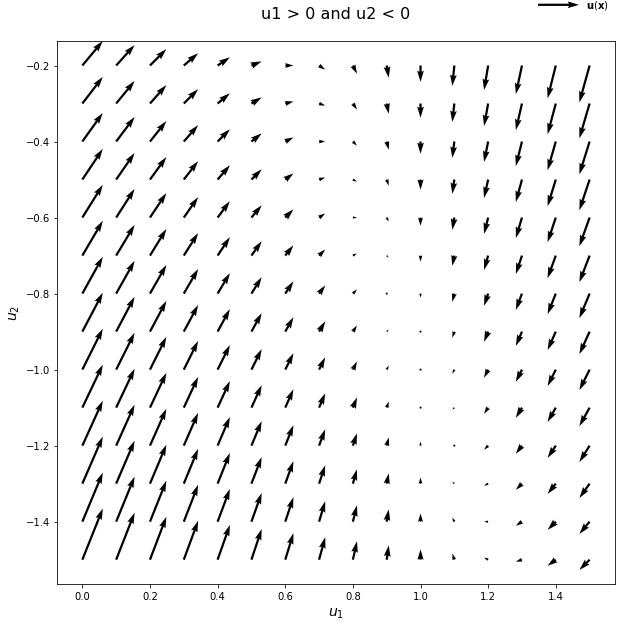

In [12]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(0, 1.6, .1), np.arange(-1.5, -0.1, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(0, 1.6, .1), np.arange(-1.5, -0.1, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 - 2 * u2_plus + 1
U2 = -u2 - 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 > 0 and u2 < 0', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

As computed from equation for fixed points when u1 > 0 and u2 < 0, It has fixed point u1 = 1 and u2 = -1. 

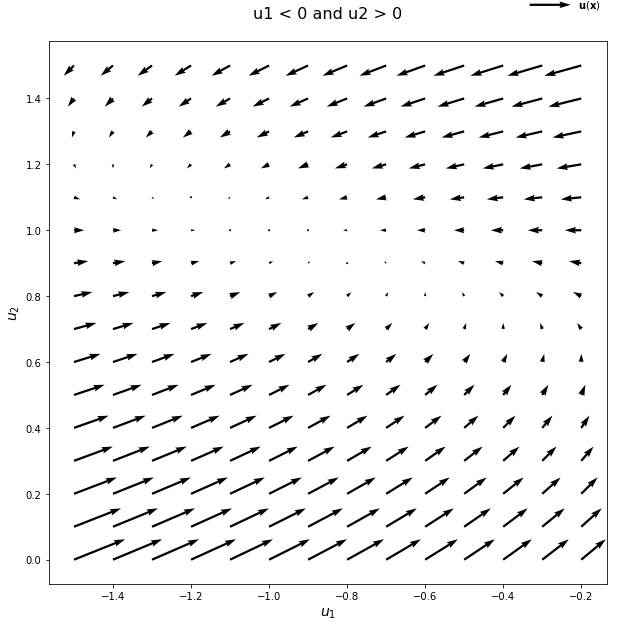

In [13]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(-1.5, -0.1, .1), np.arange(0, 1.6, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(-1.5, -0.1, .1), np.arange(0, 1.6, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 - 2 * u2_plus + 1
U2 = -u2 - 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 < 0 and u2 > 0', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

As computed from equation for fixed points when u1 < 0 and u2 > 0, It has fixed point u1 = -1 and u2 = 1. 

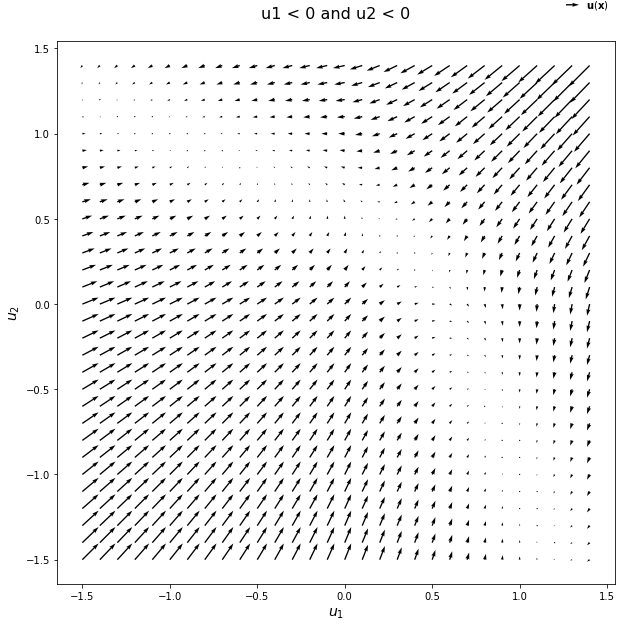

In [14]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(-1.5, 1.5, .1), np.arange(-1.5, 1.5, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(-1.5, 1.5, .1), np.arange(-1.5, 1.5, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 - 2 * u2_plus + 1
U2 = -u2 - 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 < 0 and u2 < 0', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

As computed from equation for fixed points when u1 < 0 and u2 < 0, It has fixed point u1 = 1 and u2 = 1. 

# Exercise 2.4

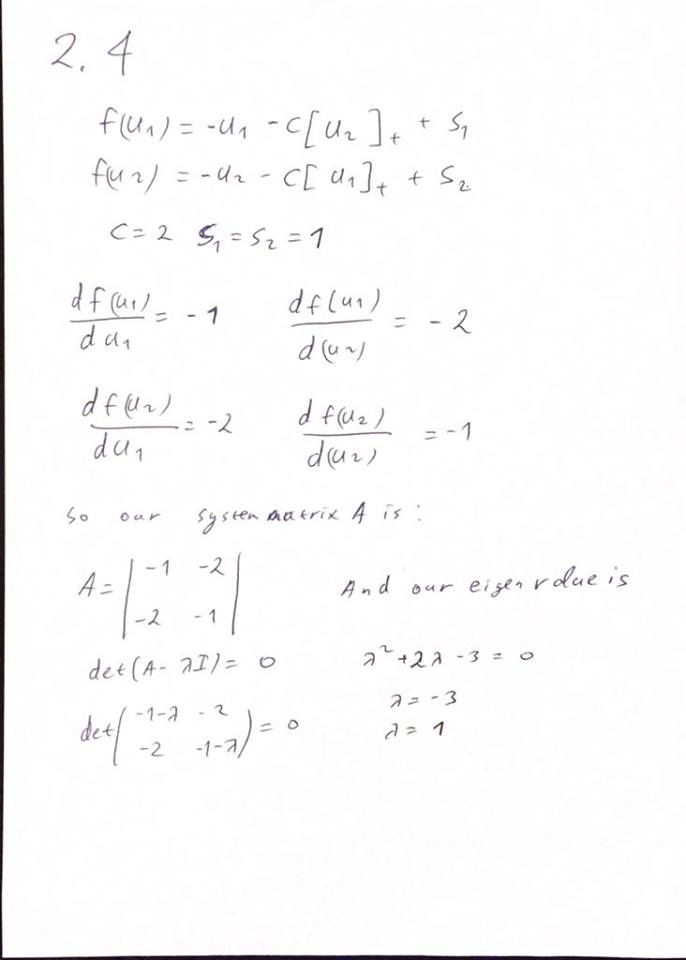

In [33]:
A = np.array([[-1, -2], [-2, -1]])
print(np.linalg.eig(A))

(array([ 1., -3.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


$\lambda_0 = -3\quad and \quad\lambda_1 = 1$ shows that the system is saddle because there is one positive eigenvalue and one negative eigenvalue. Therefore, it is showing similar charactiristics as Ex 2.2.

# Exercise 2.5

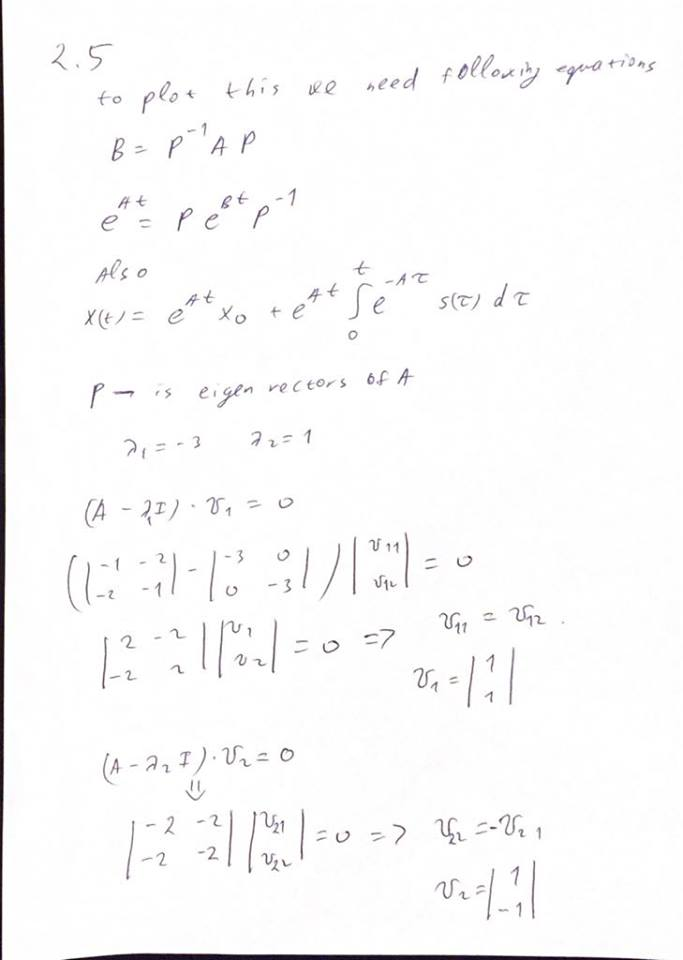

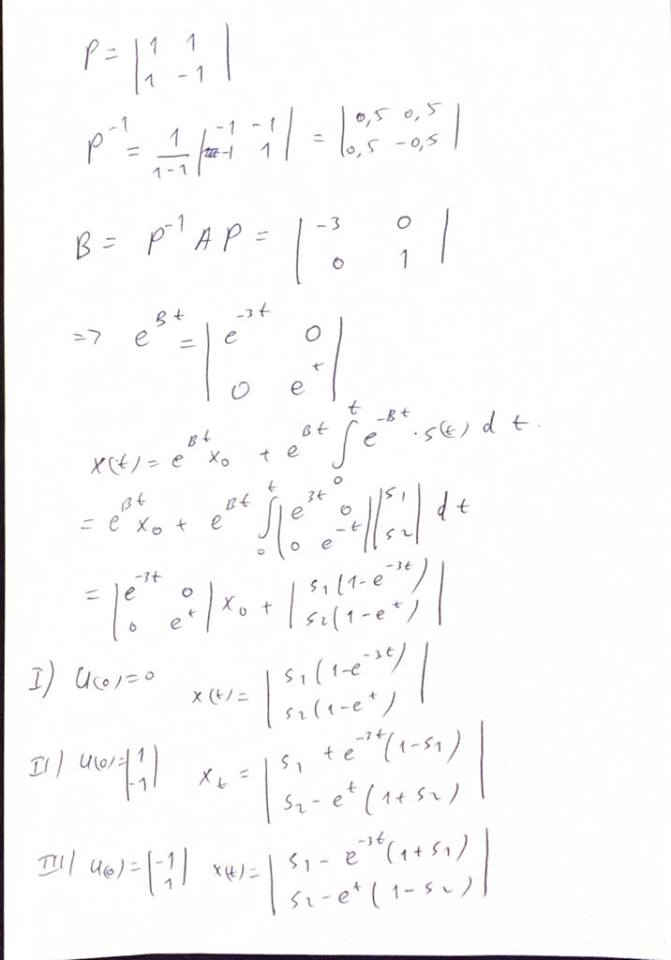

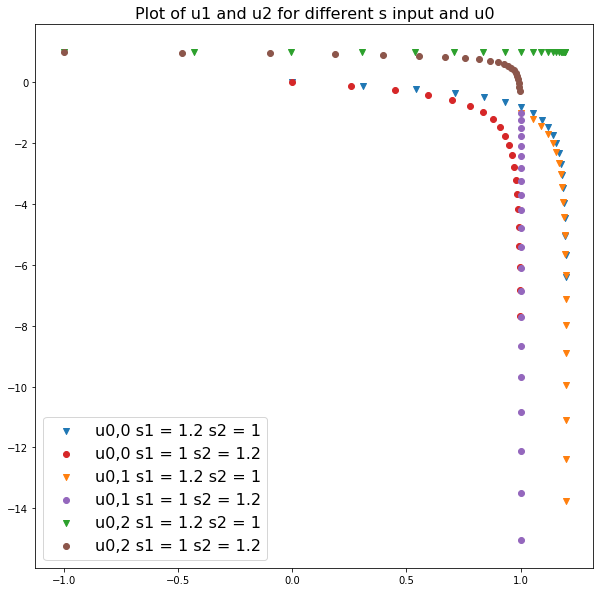

In [27]:
t = np.arange(0, 2.1, .1)
u1_1_0 = 1.2 * (1 - np.exp(-3 * t))
u2_1_0 = 1 * (1 - np.exp(t))


u1_1_1 = 1.2 + np.exp(-3 * t) * (1 - 1.2)
u2_1_1 = 1 - np.exp(t) * (1 + 1)


u1_1_2 = 1.2 - np.exp(-3 * t) * (1 + 1.2)
u2_1_2 = 1 + np.exp(t) * (1 - 1)

fig = plt.figure(figsize=(10, 10))

ax0 = plt.scatter(u1_1_0, u2_1_0, marker = 'v')
ax1 = plt.scatter(u1_1_1, u2_1_1, marker = 'v')
ax2 = plt.scatter(u1_1_2, u2_1_2, marker = 'v')

u1_2_0 = 1 * (1 - np.exp(-3 * t))
u2_2_0 = 1.2 * (1 - np.exp(t))


u1_2_1 = 1 + np.exp(-3 * t) * (1 - 1)
u2_2_1 = 1.2 - np.exp(t) * (1 + 1.2)


u1_2_2 = 1 - np.exp(-3 * t) * (1 + 1)
u2_2_2 = 1.2 + np.exp(t) * (1 - 1.2)

ax3 = plt.scatter(u1_2_0, u2_2_0)
ax4 = plt.scatter(u1_2_1, u2_2_1)
ax5 = plt.scatter(u1_2_2, u2_2_2)


ax.set_xlabel('u1')
ax.set_ylabel('u2')

plt.legend((ax0, ax3, ax1, ax4, ax2, ax5), ('u0,0 s1 = 1.2 s2 = 1', 
                                            'u0,0 s1 = 1 s2 = 1.2', 
                                            'u0,1 s1 = 1.2 s2 = 1', 
                                            'u0,1 s1 = 1 s2 = 1.2', 
                                            'u0,2 s1 = 1.2 s2 = 1', 
                                            'u0,2 s1 = 1 s2 = 1.2'), fontsize = 16)
plt.title('Plot of u1 and u2 for different s input and u0', fontsize = 16)
plt.show()

# Exercise 2.6

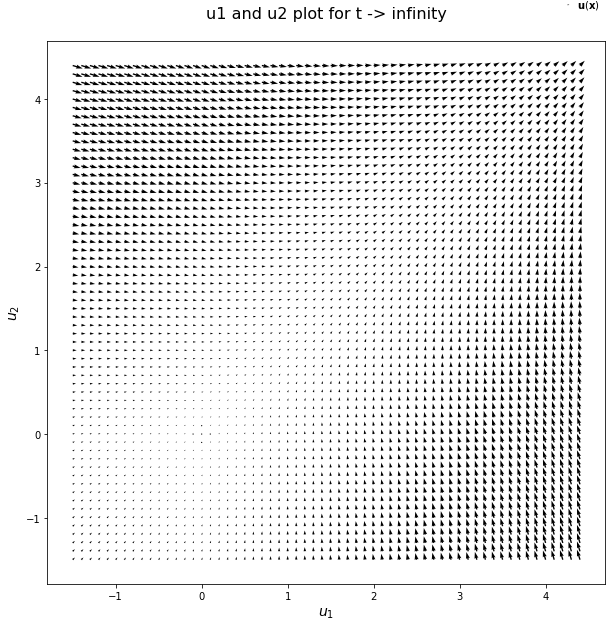

In [30]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(-1.5, 4.5, .1), np.arange(-1.5, 4.5, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(-1.5, 4.5, .1), np.arange(-1.5, 4.5, .1))
u1_plus[u1_plus < 0] = 0
u2_plus[u2_plus < 0] = 0
U1 = -u1 + 2 * u2_plus + 1
U2 = -u2 + 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 and u2 plot for t -> infinity', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

The system matrix has eigen values with $\lambda_{1,2} = -1 \pm 2i$.
In this case we dont have the four quadrants fixed points.

# Exercise 2.7

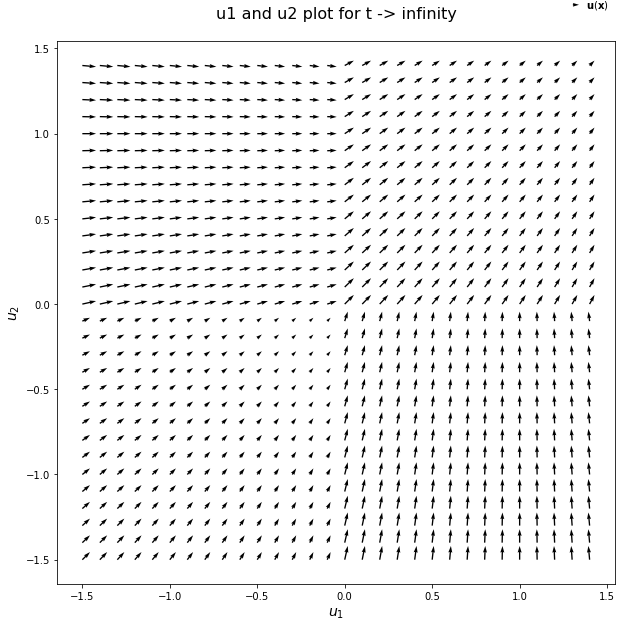

In [37]:
# define points and vectors
u1, u2 = np.meshgrid(np.arange(-1.5, 1.5, .1), np.arange(-1.5, 1.5, .1))
u1_plus, u2_plus = np.meshgrid(np.arange(-1.5, 1.5, .1), np.arange(-1.5, 1.5, .1))
u1_plus[u1_plus <= 0] = 0
u2_plus[u2_plus <= 0] = 0
u1_plus[u1_plus > 0] = 1
u2_plus[u2_plus > 0] = 1
U1 = -u1 + 2 * u2_plus + 1
U2 = -u2 + 2 * u1_plus + 1

plt.figure(figsize=(10, 10))
plt.title('u1 and u2 plot for t -> infinity', fontsize=16, y=1.03)
Q = plt.quiver(u1, u2, U1, U2)
qk = plt.quiverkey(Q, 0.85, 0.93, 2, r'$\mathbf{u}(\mathbf{x})$', labelpos='E', coordinates='figure')
plt.xlabel('$u_1$', fontsize=14)
plt.ylabel('$u_2$', fontsize=14)
plt.show()

In this case we dont have the four quadrants fixed points. Four quadrants is pointing 4 different directions. 